In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib


In [2]:
import pandas as pd
import numpy as np

# for reproducible random data
np.random.seed(42)

# number of samples (rows)
n = 2000

# generate fake sensor data
data = pd.DataFrame({
    'cycle': np.random.randint(1, 350, size=n),
    'temp_mean': np.random.normal(700, 30, size=n),
    'vibration': np.random.normal(0.02, 0.01, size=n),
    'pressure': np.random.normal(30, 3, size=n),
    'rpm': np.random.normal(10000, 500, size=n)
})

# create failure label (1 = failing soon)
data['failure'] = ((data['vibration'] > 0.025) & (data['temp_mean'] > 730)).astype(int)

# show first 5 rows
data.head()


,cycle,temp_mean,vibration,pressure,rpm,failure
0,103,681.869843,0.005991,28.983375,9531.150557,0
1,349,690.198880,0.020604,30.569973,9316.280604,0
2,271,736.695703,0.018163,32.856551,10062.818619,0
3,107,720.827002,0.011652,28.879797,10131.401743,0
4,72,696.654338,0.015314,28.740018,10334.170029,0


Data shape: (2000, 6)

First few rows:


,cycle,temp_mean,vibration,pressure,rpm,failure
0,103,681.869843,0.005991,28.983375,9531.150557,0
1,349,690.198880,0.020604,30.569973,9316.280604,0
2,271,736.695703,0.018163,32.856551,10062.818619,0
3,107,720.827002,0.011652,28.879797,10131.401743,0
4,72,696.654338,0.015314,28.740018,10334.170029,0



Missing values:
cycle        0
temp_mean    0
vibration    0
pressure     0
rpm          0
failure      0
dtype: int64

Failure counts:
failure
0    1896
1     104
Name: count, dtype: int64


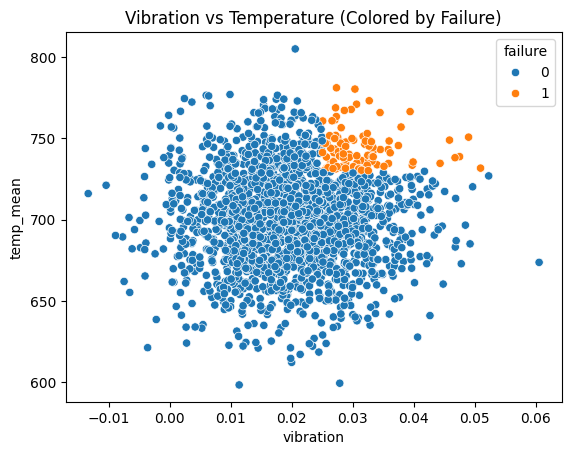

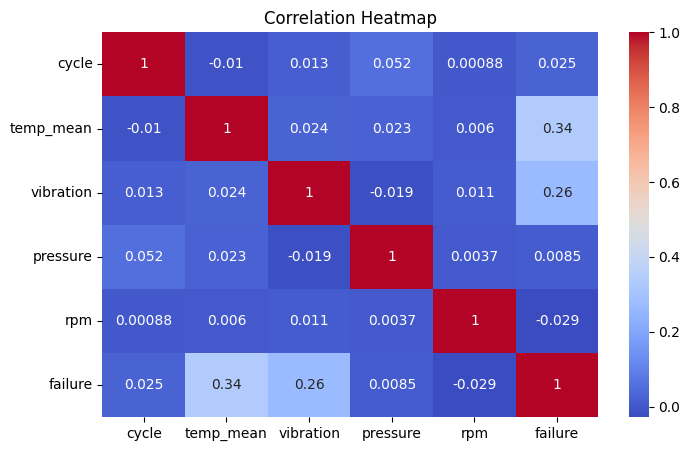

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. See basic info
print("Data shape:", data.shape)
print("\nFirst few rows:")
display(data.head())

# 2. Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# 3. See how many failures vs healthy
print("\nFailure counts:")
print(data['failure'].value_counts())

# 4. Plot vibration vs temp_mean (to see relation)
sns.scatterplot(x='vibration', y='temp_mean', hue='failure', data=data)
plt.title('Vibration vs Temperature (Colored by Failure)')
plt.show()

# 5. See overall correlations
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Model Evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00        21

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



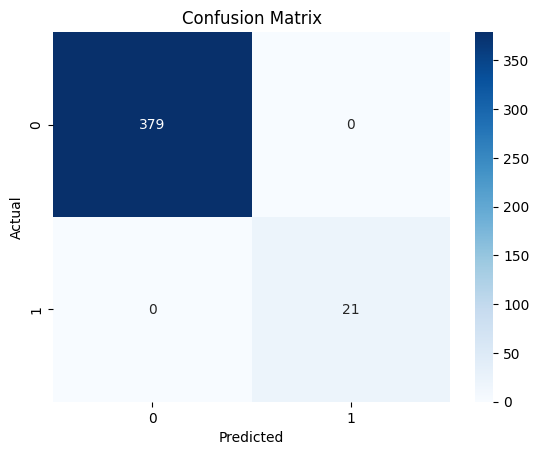

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data into features (X) and target (y)
X = data.drop('failure', axis=1)
y = data['failure']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Show evaluation report
print("Model Evaluation:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [5]:
import joblib

# Save the trained model
joblib.dump(model, "failure_prediction_model.pkl")

print("✅ Model saved successfully as failure_prediction_model.pkl")


✅ Model saved successfully as failure_prediction_model.pkl


In [6]:
import numpy as np
import joblib

# Load the saved model
model = joblib.load("failure_prediction_model.pkl")

# Example new input: [vibration, temp_mean, pressure, humidity]
new_data = np.array([[0.8, 72, 2.1, 40]])

# Make prediction
prediction = model.predict(new_data)

if prediction[0] == 1:
    print("⚠️ Warning: Component likely to FAIL.")
else:
    print("✅ Component is functioning normally.")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but RandomForestClassifier is expecting 5 features as input.